<a href="https://colab.research.google.com/github/williamlapa/categorizar_ccee/blob/master/PrepML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


Mounted at /content/drive


### Apresentação do Dataset

In [2]:

# leitura de todos os csvs

# path_ccee='/content/drive/MyDrive/ml/entrada'
# # path_ccee='https://github.com/williamlapa/categorizar_ccee/blob/master/ml/entrada'
import pandas as pd
import numpy as np
# from os import listdir
# from os.path import isfile
# from os.path import join

# onlyfiles =  ([f"{f}" for f in listdir(path_ccee) if isfile(join(path_ccee, f))])
# # onlyfiles= ['Descritivo Simplificado de Ajustes_Fevereiro20_Final.xlsx', 'Descritivo Simplificado de Ajustes_Dezembro20_Contabilizaç¦o.xlsx', 'Descritivo Simplificado de Ajustes_Julho20_Contabilizaç¦o.xlsx', 'Descritivo Simplificado de Ajustes_Novembro20_Contabilizaç¦o.xlsx', 'Descritivo Simplificado de Ajustes_Outubro20_Contabilizaç¦o.xlsx', 'Descritivo Simplificado de Ajustes_Setembro20_Contabilizaç¦o.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Abr17.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Out17.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contabilizaç¦o de Maio 2016.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes_Jul19.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Jun17.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Mai17.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Fev17.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Jan17.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Dez16.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Novembro 2016.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contabilizaç¦o de Setembro 2016.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contabilizaç¦o de Agosto 2016.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contabilizaç¦o de Julho 2016.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contabilizaç¦o de Junho 2016.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Set18.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Ago18.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Jun18.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Maio18.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Abr18.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Mar18.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Fev18.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Jan18.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Nov17.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Set17.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Ago17.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Jul17.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Mar17.xlsx', 'Descritivo de Ajustes_Junho20_Contabilizaç¦o.xlsx', 'Descritivo de Ajustes_Maio20_Contabilizaç¦o.xlsx', 'Descritivo de Ajustes_Abril20_Contabilizaç¦o.xlsx', 'Descritivo de Ajustes_Março20_Contabilizaç¦o.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes_Jan20.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes_Dez19.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes_Nov19.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes_Out19.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes_Set19.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes_Ago19.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes_Jun19.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes_Mai19.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes_Abr19.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes_Mar19.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes_Fev19.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes_Dez18.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes_Nov18.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Out18.xlsx', 'Descritivo Simplificado de Ajustes_Agosto20_Contabilizaç¦o.xlsx', 'Descritivo de Ajustes e Impactos aos Agentes - Contab de Dez17.xlsx']
# print(onlyfiles)
# # ?raw=true

In [ ]:
# #Aqui está a leitura
# #primeiros os dados do output
# path_acronimo='https://github.com/treakj/cienciadedados/blob/main/acronimos_rev2.xlsx?raw=true'
# #path_tarifas='https://github.com/treakj/cienciadedados/blob/main/tarifas202019.zip'
# #path_eventos='https://github.com/treakj/cienciadedados/blob/0aeef662bf8c068c218134868ee326c5faad8007/eventos.csv'



# #leitura dos dados de entrada da CCEE
# count=0
# for name in onlyfiles:
#   #na_values=-9999
#   partial=pd.read_excel(f"{path_ccee}/{name}", skipfooter=1)
#   if count>0:
#     tot=tot.append(partial)
#   else:
#     tot=partial
#   count+=1
# tot

# tot = tot[tot['Unnamed: 0'].notnull()]
# tot.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         1770 non-null   float64
 1   Título do Ajuste - conforme relatório SUMÁRIO-001  1767 non-null   object 
 2   Descrição do Ajuste                                1767 non-null   object 
 3   Descrição de Impacto                               1767 non-null   object 
 4   Impacto Principal                                  1748 non-null   object 
 5   Observação                                         624 non-null    object 
dtypes: float64(1), object(5)
memory usage: 96.8+ KB


In [ ]:
# tot.to_excel('entradaempilhada.xlsx')
# !cp entradaempilhada.xlsx "drive/My Drive/ml/saida"

In [ ]:

# #começa daqui
# path_acronimo='https://github.com/treakj/cienciadedados/blob/main/acronimos_rev2.xlsx?raw=true'
# # path_total='https://github.com/williamlapa/categorizar_ccee/blob/master/saidamerged.xlsx?raw=true'
 
# # tot = pd.read_excel(path_total)
# acronimo = pd.read_excel(path_acronimo)
# acronimo['Chave']=acronimo['NOME'].apply(lambda x: str(x).replace('(*)','').replace('_','-'))

# tot['Chave']=tot['Título do Ajuste - conforme relatório SUMÁRIO-001'].apply(lambda x: str(x).replace('(*)','').replace('_','-').replace('                                         ','\n').split('\n')[0])

# merged=tot.merge(acronimo, right_on='Chave', left_on='Chave', how='left')
# # merged=tot.join(acronimo,how='left', on='Chave')

# merged['TIPO'].fillna('Sem categoria', inplace=True)
# merged['Título do Ajuste - conforme relatório SUMÁRIO-001'].fillna('', inplace=True)
# merged['Descrição do Ajuste'].fillna('', inplace=True)
# merged['Descrição de Impacto'].fillna('', inplace=True)
# merged['Impacto Principal'].fillna('', inplace=True)
# # merged.loc[merged['Título do Ajuste - conforme relatório SUMÁRIO-001'].str.contains('Encargo Liquidação MCP'),'TIPO']='Não considerar'

# merged.to_excel('saidamerged.xlsx')
# !cp saidamerged.xlsx "drive/My Drive/ml/saida"


#pd.read_csv(path_eventos, sep=";" ,encoding='utf-8')

##### Projeto começa daqui


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Unnamed: 0                                         1770 non-null   int64 
 1   Unnamed: 0.1                                       1770 non-null   int64 
 2   Título do Ajuste - conforme relatório SUMÁRIO-001  1770 non-null   object
 3   Descrição do Ajuste                                1770 non-null   object
 4   Descrição de Impacto                               1770 non-null   object
 5   Impacto Principal                                  1770 non-null   object
 6   Observação                                         624 non-null    object
 7   Chave                                              1755 non-null   object
 8   TIPO                                               1770 non-null   object
 9   NOME               

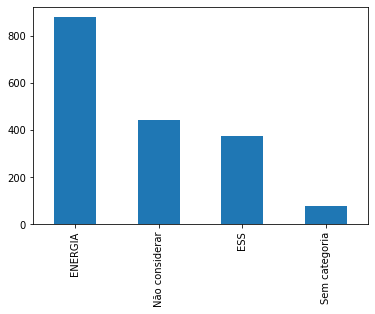

In [3]:

import pandas as pd
import numpy as np
path_merged='https://github.com/williamlapa/categorizar_ccee/blob/master/saidamerged.xlsx?raw=true'
merged = pd.read_excel(path_merged)
merged['TIPO'].value_counts().plot(kind='bar')
# acronimo = pd.read_excel(path_acronimo)
merged['TIPO'].fillna('Sem categoria', inplace=True)
merged['Título do Ajuste - conforme relatório SUMÁRIO-001'].fillna('', inplace=True)
merged['Descrição do Ajuste'].fillna('', inplace=True)
merged['Descrição de Impacto'].fillna('', inplace=True)
merged['Impacto Principal'].fillna('', inplace=True)
merged.info()
# tot.to_excel('teste.xlsx')
# !cp teste.xlsx "drive/My Drive/ml/"

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# pipeline = Pipeline([
#     ('vect', CountVectorizer(max_df=1.0, max_features=50000,ngram_range=(1,2))),
#     ('tfidf', TfidfTransformer(use_idf=True,norm='l2')),
#     ('clf', SGDClassifier(loss='log',alpha=1e-06, penalty='elasticnet')), # default hinge. to get proba=log or modified_huber
# ])
pipeline = Pipeline([
    ('vect', CountVectorizer(max_df=1.0, max_features=50000,ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True,norm='l2')),
    ('clf', SGDClassifier(loss='hinge',alpha=1e-06, penalty='elasticnet')), # default hinge. to get proba=log or modified_huber
])

# parametro loss é uma função que vai computar o erro num teste de classificação.
# parametro penalty define como o algoritmo de treinamento vai tratar o erro, o elasticnet pode usar uma rede elástica, podendo zerar features com contribuição baixa (nem precisa usar o stopwords)
# alpha é a intensidade da alteração. como é que posso dizer, é o learning rate, o ritmo de aprendizado do algorítimo. 

In [7]:
merged['todas_as_colunas']=merged['Título do Ajuste - conforme relatório SUMÁRIO-001']+merged['Descrição do Ajuste']+merged['Descrição de Impacto']+merged['Impacto Principal']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged['todas_as_colunas'], merged['TIPO'], test_size=0.2, 
                                                    stratify=merged['TIPO'],random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [16]:
classificador = pipeline.fit(X_train, y_train)
print(classificador.score(X_test,y_test))

cv_result = cross_val_score(classificador, X_train, y_train, cv=3, scoring='accuracy')
print(cv_result.mean())


0.9717514124293786
0.9512711864406779


array([0.94067797, 0.96610169, 0.9470339 ])

In [ ]:
# teste mais generalizado com seeds até 100
avaliacao=[]
for i in range(1,200):
  X_train, X_test, y_train, y_test = train_test_split(merged['todas_as_colunas'], merged['TIPO'], test_size=0.2,  
                                                      stratify=merged['TIPO'],random_state=i)
  classificador = pipeline.fit(X_train, y_train)
  score = classificador.score(X_test,y_test)
  avaliacao.append({"score":score, "seed": i})





In [ ]:

from sklearn.model_selection import StratifiedShuffleSplit

,score,seed
count,199.000000,199.000000
mean,0.960651,100.000000
std,0.009302,57.590508
min,0.935028,1.000000
25%,0.954802,50.500000
50%,0.960452,100.000000
75%,0.967514,149.500000
max,0.983051,199.000000


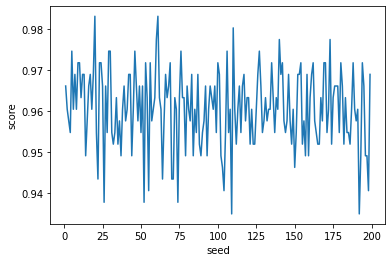

In [ ]:
# grafico da avaliaçao de seed
import seaborn as sns
sns.lineplot(data = pd.DataFrame(avaliacao), x='seed', y='score')
pd.DataFrame(avaliacao).describe()

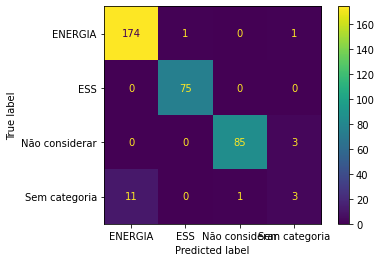

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classificador, X_test, y_test, values_format='d')